# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

Давайте посчитаем градиент и гессиан функции $f(x)$:
$$
\nabla f(x) = \arctan x + \frac{x}{1+x^2} - \frac{x}{1+x^2} = \arctan x
$$

$$
\nabla^2 f(x) = \frac{1}{1+x^2} \succ 0
$$


$$
\nabla^3 f(x) = \frac{-2x}{(1+x^2)^2}
$$

$$
x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)} = x_k - \arctan x_k \cdot (1 + x_k^2)
$$
Условием сходимости этого процесса будет следующее неравенство:
$$
|S'(x)| \leq q < 1
$$
, где $S(x) = x_k - \frac{f'(x_k)}{f''(x_k)}$, из этого получаем условие:

$$
\left|\frac{f'(x)f'''(x)}{(f'(x))^2} \right|\leq q < 1
$$
Эта область небольшая, поэтому нужно аккуратно подбирать начальную точку.

$$
\left|\left(\arctan (x)  \frac{-2x}{(1+x^2)^2} \right) \cdot (1+x^2)^2 \right| = \left|2x \cdot \arctan x \right|
$$

Подставим теперь точки $x_0 = 1.3$ и $x_0 = 1.5$ в это неравенство.
1. $2 \cdot 1.3 \cdot \arctan (1.3) \geq 2$
2. $2 \cdot 1.5 \cdot \arctan (1.5) \geq 2.9$

Ни одна из точек не подходит для начальной точки.

Если нам нужна начальная точка, то мы должна её выбирать из следующего интервала:

$x \in [-0.76, 0.76] \rightarrow |2x \arctan x| < 1$

Learning rate для градиентного спуска же можем выбрать, как $\frac{1}{L}$, где $L = \frac{\pi}{2}$

In [22]:
import math
from math import atan, log, pi
import numpy as np
import matplotlib.pyplot as plt

In [128]:
from importlib import reload
import HW_9
reload(HW_9)
from HW_9 import Optimizer

In [113]:
args = {}
args['test'] = False
def function(x, args):
    return x*atan(x) - 0.5*log(1+x**2)
def grad_function(x, args):
    return atan(x)
def hessian_function(x, args):
    return 1/(1 + x**2)
def lr(x, args):
    return 2/pi

In [68]:
gd1 = Optimizer(func=function, grad_func=grad_function, hessian_func=hessian_function, w0=1.3, learning_rate=lr, iter=11, args=args, name='gd', label='simple gd ($x_0 = 1.3$)')
gd1.fit()
gd2 = Optimizer(func=function, grad_func=grad_function, hessian_func=hessian_function, w0=1.5, learning_rate=lr, iter=11, args=args, name='gd', label='simple gd ($x_0 = 1.5$)')
gd2.fit()

In [69]:
newton1 = Optimizer(func=function, grad_func=grad_function, hessian_func=hessian_function, w0=1.3, learning_rate=lambda x, args: 1, iter=11, args=args, name='newton', label='simple newton ($x_0 = 1.3$)')
newton1.fit()
newton2 = Optimizer(func=function, grad_func=grad_function, hessian_func=hessian_function, w0=1.5, learning_rate=lambda x, args: 1, iter=11, args=args, name='newton', label='simple newton ($x_0 = 1.5$)')
newton2.fit()

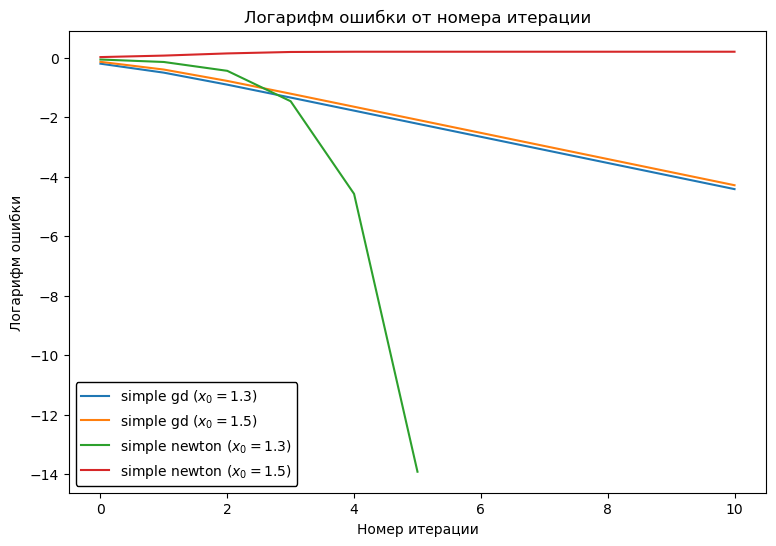

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))

for tmp in [gd1, gd2, newton1, newton2]:
    ax.plot(range(len(tmp.errors)), np.log10(tmp.errors), label=tmp.label)
    

ax.set_title("Логарифм ошибки от номера итерации")
legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")

None

In [71]:
print(f"GD x_0 = 1.3: {gd1.w}")
print(f"GD x_0 = 1.5: {gd2.w}")
print(f"Newton x_0 = 1.3: {newton1.w}")
print(f"Newton x_0 = 1.5: {newton2.w}")

GD x_0 = 1.3: 3.7885905767236246e-05
GD x_0 = 1.5: 5.1222962047729734e-05
Newton x_0 = 1.3: 1.2045171040057576e-14
Newton x_0 = 1.5: -9.459476350342202e+216


## Вывод:
Точное решение $x_* = 0$, метод Ньютона очень быстро сходится по сравнению с обычным градиентным спуском, но для него нужно аккуратно подбирать начальную точку, иначе он может не сойтись, как это произошло с точкой $x_0 = 1.5$.

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

$$
x_{new} = \arg \min_{y} \left[\langle f'(x), y-x\rangle + \frac{1}{2}\langle f''(x)(y-x), y-x \rangle + \frac{M}{6} ||y-x||^3 \right]
$$
Выпишем формулу в явном виде для нашей задачи:
$$
\min \left[\arctan(x)(y-x) + \frac{(y-x)^2}{2(1+x^2)} + \frac{M|y-x|^3}{6} \right]
$$

Возьмем производную от этого и приравняем к нулю
$$
\arctan(x) + \frac{y-x}{1+x^2} + \frac{sign(y-x) (y-x^2)}{2} = 0
$$
Сделаем замену и найдем выражение: $t = y-x $
Разбираться со знаком не будем, просто решим уравнение в двух вариантах и сравним те решения, которые подходят под это знак.

$$
\frac{M}{2}t^2 + \frac{t}{1+x^2} + \arctan(x) = 0
$$

$$
t = \frac{-\frac{1}{1+x^2} \pm \sqrt{(\frac{1}{1+x^2})^2 \pm 2M \arctan(x)}}{M}
$$

$$
y = x + \frac{-\frac{1}{1+x^2} \pm \sqrt{(\frac{1}{1+x^2})^2 \pm 2M \arctan(x)}}{M}
$$


In [146]:
from importlib import reload
import HW_9
reload(HW_9)
from HW_9 import Optimizer

In [143]:
cubic = Optimizer(func=function, grad_func=grad_function, hessian_func=hessian_function, w0=1.5, learning_rate=lambda x, args: 1, iter=100, args=args, name='cubicnewton', label='cubicnewton')
cubic.fit()


In [150]:
demph = Optimizer(func=function, grad_func=grad_function, hessian_func=hessian_function, w0=1.5, learning_rate=lambda x, args: 1/10, iter=100, args=args, name='newton', label='newton demph')
demph.fit()

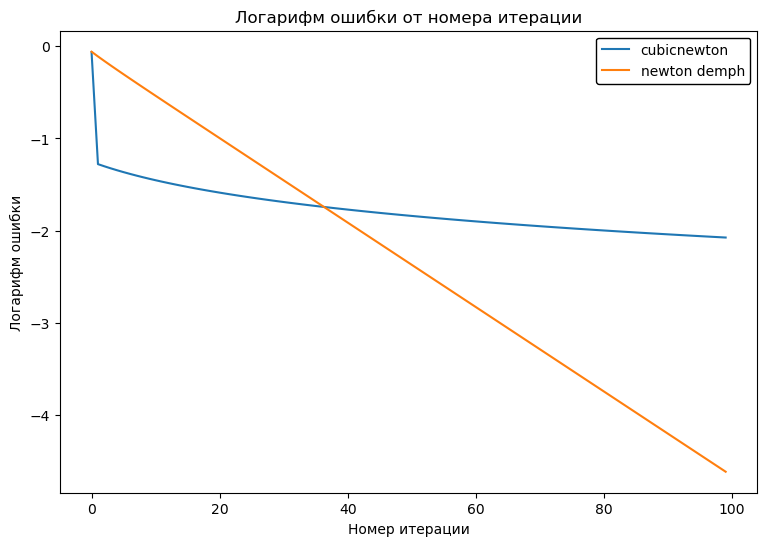

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))

for tmp in [cubic, demph]:
    ax.plot(range(len(tmp.errors)), np.log10(tmp.errors), label=tmp.label)
    

ax.set_title("Логарифм ошибки от номера итерации")
legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")
None

# Вывод:
Демпфированный шаг в методе Ньютона и кубический метод Ньютона решают проблему, и методы начинают сходится, другим методом может быть примененный градиентный спуск, а потом метод Ньютона.

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

\begin{equation}
hessian f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 \cdot x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
\end{equation}

In [59]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [61]:
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y = y*2 - 3
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(8124, 112) (8124,)


In [62]:
hessian = np.zeros((d, d))

for a, b in zip(X_train[:], y_train):
    hessian = hessian + 1/n  * np.outer(a, a)

hessian = hessian / 4
L = np.linalg.norm(hessian, 2)

In [94]:
args = {}
args['X_train'] = X_train
args['X_test']  = X_test
args['y_train'] = y_train
args['y_test']  = y_test
args['L'] = L
args['lambda'] = L/100
args['test'] = True
def function_log(w, args):
    sum = 0
    X = args['X_train']
    Y = args['y_train']
    n = args['X_train'].shape[0]
    
    for i in range(len(Y)):     
        sum = sum + 1/n * np.log(1 + np.exp(-Y[i] * X[i] @ w)) 
        
    return sum + 0.5*args['lambda'] * w @ w

def grad_function_log(w, args):
    X = args['X_train']
    Y = args['y_train']
    sum = np.zeros(w.shape)
    n = X.shape[0]
    for i in range(len(Y)):
        sum = sum  - 1/n * Y[i] * X[i] /(1 + np.exp(-Y[i] * w @ X[i])) * np.exp(-Y[i] * w @ X[i])

    return sum + args['lambda'] * w
def hessian_function_log(w, args):
    X = args['X_train']
    Y = args['y_train']
    n = X.shape[0]
    sum = np.zeros((X.shape[1], X.shape[1]))
    for i in range(1, len(Y)):
        sum = sum + 1/n * np.outer(X[i], X[i]) * np.exp(Y[i] * w @ X[i])/((1+np.exp(Y[i] * w @ X[i])) ** 2)
    return sum + args['lambda'] * np.eye(X.shape[1])

def learning_rate_log(x, args):
    return 1/args['L']

In [103]:
from importlib import reload
import HW_9
reload(HW_9)
from HW_9 import Optimizer

In [107]:
quasi = Optimizer(func=function_log, grad_func=grad_function_log, hessian_func=hessian_function_log, w0=np.zeros(X_train.shape[1]), learning_rate=learning_rate_log, iter=50, args=args, name='gd', label='gd + newton')
quasi.fit()

In [108]:
quasi.name = 'newton'
quasi.iter = 30
quasi.learning_rate = lambda x, args: 1
quasi.fit()

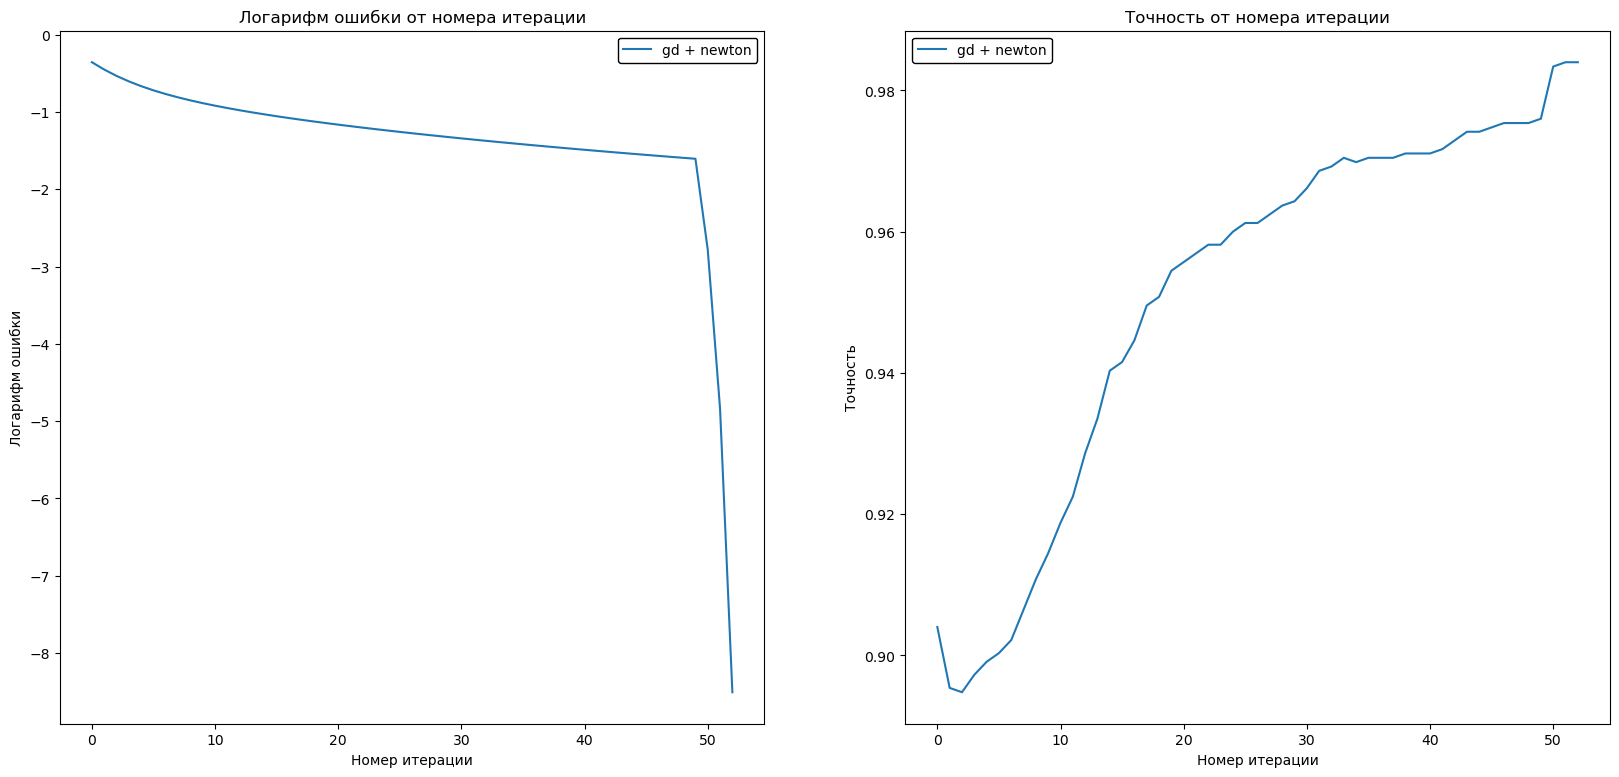

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(20,9))

for tmp in [quasi]:
    ax[0].plot(range(len(tmp.errors)), np.log10(tmp.errors), label=tmp.label)
    ax[1].plot(range(len(tmp.accuracy)), tmp.accuracy, label=tmp.label)

ax[0].set_title("Логарифм ошибки от номера итерации")
legend_box = ax[0].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[0].set_xlabel("Номер итерации")
ax[0].set_ylabel("Логарифм ошибки")

ax[1].set_title("Точность от номера итерации")
legend_box = ax[1].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[1].set_xlabel("Номер итерации")
ax[1].set_ylabel("Точность")
None

## Вывод:
Была применена следующая эвристика, первые 50 итераций выполняются градиентным спуском, чтобы попасть в область сходимости метода Ньютона, далее спуск происходил с помощью метода Ньютона, что дало значительное уменьшение логарифма ошибка и повышение точности на тестовой выборке.

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [2]:
#ответ

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [ ]:
#ответ